In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import pyreadr

In [2]:
# Carregar o arquivo RData
result = pyreadr.read_r('bebes.RData')

# Extrair o DataFrame
df_bebes = result['bebes']

# Agora, df é um DataFrame do pandas
print(df_bebes.head())

   comprimento  idade
0        63.07  19.00
1        65.63  21.00
2        65.63  22.50
3        66.73  22.50
4        66.37  23.25


In [3]:
#Características das variáveis do dataset
df_bebes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comprimento  74 non-null     float64
 1   idade        74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [4]:
#Estatísticas univariadas
df_bebes.describe()

,comprimento,idade
count,74.000000,74.000000
mean,66.921622,25.312162
std,12.852386,12.975168
min,31.900000,2.150000
25%,56.470000,12.500000
50%,70.400000,26.000000
75%,75.807500,33.000000
max,87.630000,60.000000


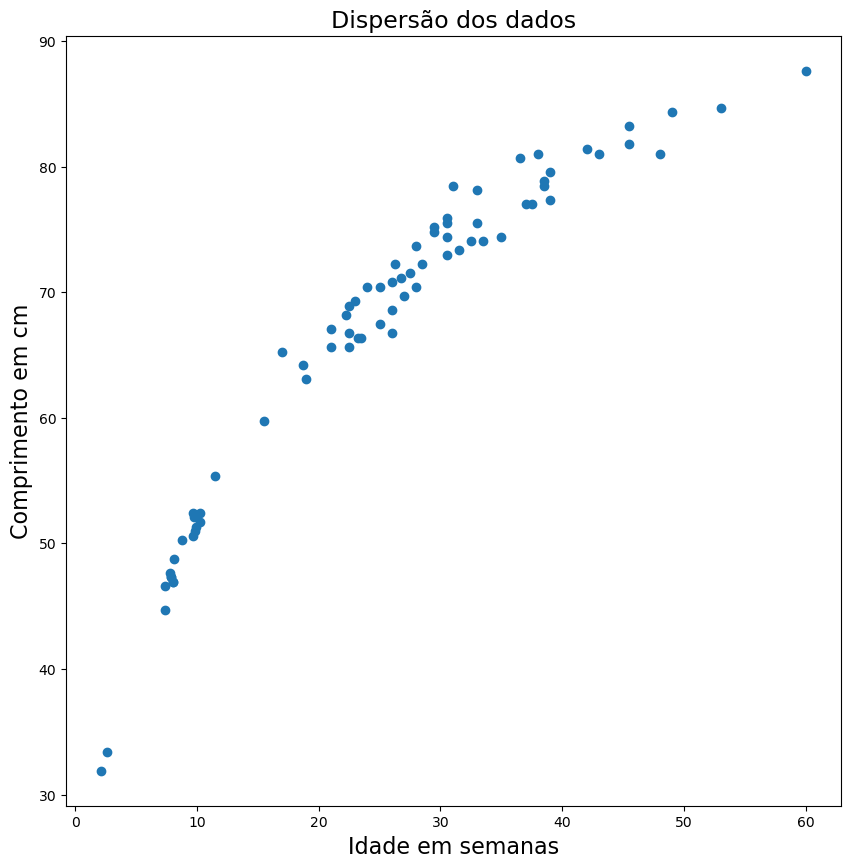

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(df_bebes['idade'],df_bebes['comprimento'])
plt.title('Dispersão dos dados', fontsize=17)
plt.xlabel('Idade em semanas', fontsize=16)
plt.ylabel('Comprimento em cm', fontsize=16)
plt.show()

In [6]:
# In[ ]: Estimação de um modelo OLS linear
modelo_linear = sm.OLS.from_formula('comprimento ~ idade', df_bebes).fit()

In [7]:
#Observar os parâmetros resultantes da estimação
modelo_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            comprimento   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     667.7
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           3.72e-38
Time:                        20:54:19   Log-Likelihood:                -207.26
No. Observations:                  74   AIC:                             418.5
Df Residuals:                      72   BIC:                             423.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.1004      1.034     41.665      0.000      41.038      45.163
idade          0.9411      0.036     25.841      0.000       0.868       1.014
==============================================================================
Omnibus:                       21.203   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.159
Skew:                          -1.218   Prob(JB):                     4.66e-07
Kurtosis:                       4.877   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos

from sfrancia import shapiroFrancia
shapiroFrancia(modelo_linear.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9087044262594455,
 'statistics z': 3.627650491545387,
 'p-value': 0.00014300603555437218}

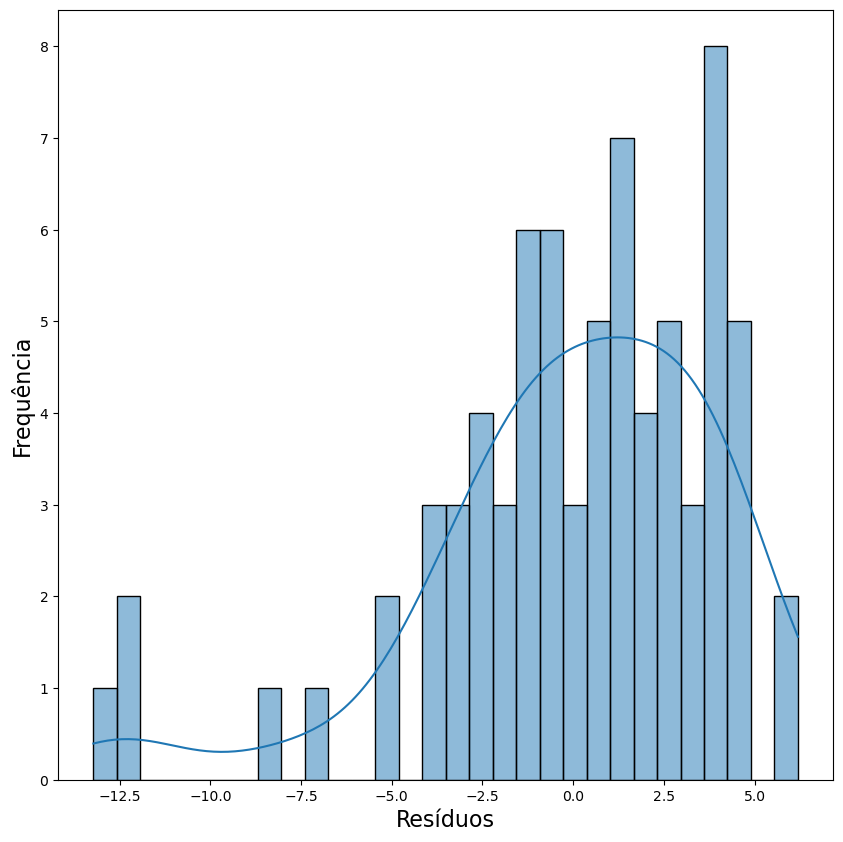

In [9]:
# In[ ]: Histograma dos resíduos do modelo OLS linear

plt.figure(figsize=(10,10))
sns.histplot(data=modelo_linear.resid, kde=True, bins=30)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()

In [10]:
# In[ ]: Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

In [11]:
#x é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
x, lmbda = boxcox(df_bebes['comprimento'])

In [12]:
#Inserindo a variável transformada ('bc_comprimento') no dataset
#para a estimação de um novo modelo
df_bebes['bc_comprimento'] = x

df_bebes

,comprimento,idade,bc_comprimento
0,63.07,19.00,22966.083193
1,65.63,21.00,25529.065309
2,65.63,22.50,25529.065309
3,66.73,22.50,26682.722356
4,66.37,23.25,26301.657668
...,...,...,...
69,75.90,30.50,37577.490653
70,78.47,31.00,41056.602846
71,80.67,36.50,44189.008109
72,81.03,38.00,44715.317793


In [13]:
#Apenas para fins de comparação e comprovação do cálculo de x
df_bebes['bc_comprimento2'] = ((df_bebes['comprimento']**lmbda)-1)/lmbda

df_bebes

,comprimento,idade,bc_comprimento,bc_comprimento2
0,63.07,19.00,22966.083193,22966.083193
1,65.63,21.00,25529.065309,25529.065309
2,65.63,22.50,25529.065309,25529.065309
3,66.73,22.50,26682.722356,26682.722356
4,66.37,23.25,26301.657668,26301.657668
...,...,...,...,...
69,75.90,30.50,37577.490653,37577.490653
70,78.47,31.00,41056.602846,41056.602846
71,80.67,36.50,44189.008109,44189.008109
72,81.03,38.00,44715.317793,44715.317793


In [14]:
del(df_bebes['bc_comprimento2'])

In [15]:
# In[ ]: Estimando um novo modelo OLS com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_comprimento ~ idade', df_bebes).fit()

In [16]:
#Parâmetros do modelo
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bc_comprimento   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1822.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           7.16e-53
Time:                        20:54:20   Log-Likelihood:                -681.77
No. Observations:                  74   AIC:                             1368.
Df Residuals:                      72   BIC:                             1372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4995.1602    630.253      7.926      0.000    3738.774    6251.546
idade        947.2298     22.189     42.689      0.000     902.997     991.463
==============================================================================
Omnibus:                        1.140   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.557
Skew:                           0.098   Prob(JB):                        0.757
Kurtosis:                       3.377   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# In[ ]: Comparando os parâmetros do 'modelo_linear' com os do 'modelo_bc'
#CUIDADO!!! OS PARÂMETROS NÃO SÃO DIRETAMENTE COMPARÁVEIS!

summary_col([modelo_linear, modelo_bc])

,comprimento,bc_comprimento
Intercept,43.1004,4995.1602
,(1.0345),(630.2528)
idade,0.9411,947.2298
,(0.0364),(22.1889)
R-squared,0.9027,0.9620
R-squared Adj.,0.9013,0.9615


In [18]:
#Outro modo mais completo também pela função 'summary_col'
summary_col([modelo_linear, modelo_bc],
            model_names=["MODELO LINEAR","MODELO BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,MODELO LINEAR,MODELO BOX-COX
Intercept,43.1004***,4995.1602***
,(1.0345),(630.2528)
idade,0.9411***,947.2298***
,(0.0364),(22.1889)
R-squared,0.9027,0.9620
R-squared Adj.,0.9013,0.9615
N,74,74


In [19]:
#Repare que há um salto na qualidade do ajuste para o modelo não linear (R²)

pd.DataFrame({'R² OLS':[round(modelo_linear.rsquared,4)],
              'R² Box-Cox':[round(modelo_bc.rsquared,4)]})

,R² OLS,R² Box-Cox
0,0.9027,0.962


In [20]:
# In[ ]: Verificando a normalidade dos resíduos do 'modelo_bc'

# Teste de Shapiro-Francia
shapiroFrancia(modelo_bc.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9729952103345915,
 'statistics z': 1.2666151749154833,
 'p-value': 0.10264646186556009}

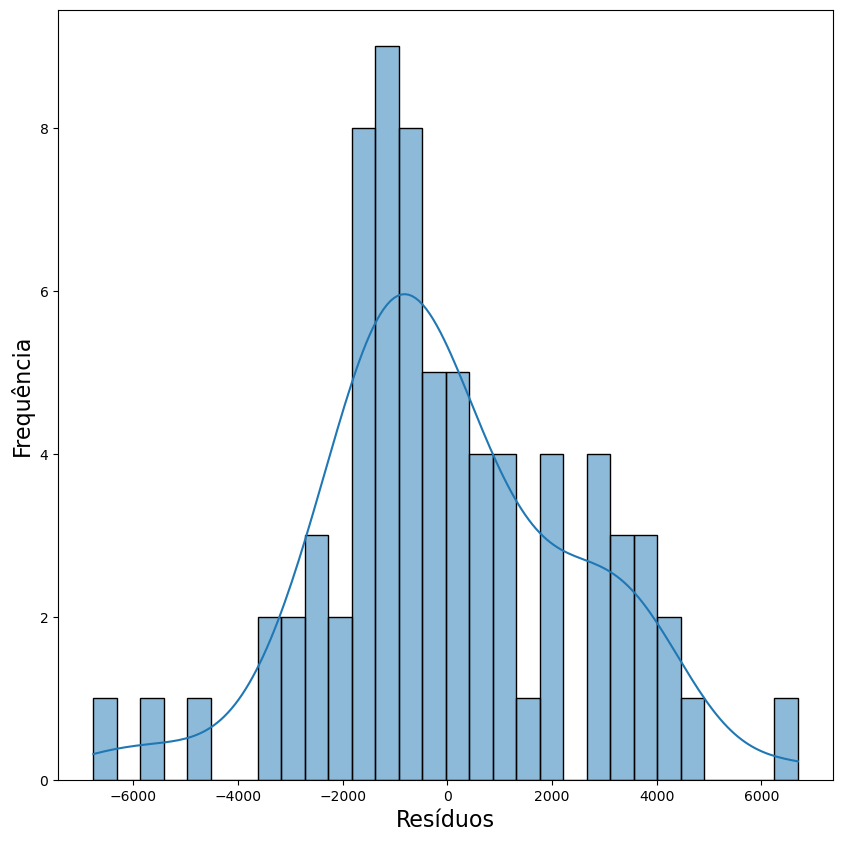

In [21]:
# In[ ]: Histograma dos resíduos do modelo_bc

plt.figure(figsize=(10,10))
sns.histplot(data=modelo_bc.resid, kde=True, bins=30)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()


In [22]:
# In[ ]: Fazendo predições com os modelos OLS linear e Box-Cox
#Qual é o comprimento esperado de um bebê com 52 semanas de vida?

#Modelo OLS Linear:
modelo_linear.predict(pd.DataFrame({'idade':[52]}))

0    92.037486
dtype: float64

In [23]:
#Modelo Não Linear (Box-Cox):
modelo_bc.predict(pd.DataFrame({'idade':[52]}))

0    54251.109775
dtype: float64

In [24]:
#Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted
#value de Y (variável 'comprimento')
(54251.109775 * lmbda + 1) ** (1 / lmbda)

87.14006473485827

In [25]:
# In[ ]: Salvando os fitted values dos dois modelos (modelo_linear e modelo_bc)
#no dataset 'bebes'

df_bebes['yhat_linear'] = modelo_linear.fittedvalues
df_bebes['yhat_modelo_bc'] = (modelo_bc.fittedvalues * lmbda + 1) ** (1 / lmbda)
df_bebes

,comprimento,idade,bc_comprimento,yhat_linear,yhat_modelo_bc
0,63.07,19.00,22966.083193,60.981260,63.097300
1,65.63,21.00,25529.065309,62.863455,65.004303
2,65.63,22.50,25529.065309,64.275102,66.375858
3,66.73,22.50,26682.722356,64.275102,66.375858
4,66.37,23.25,26301.657668,64.980925,67.044337
...,...,...,...,...,...
69,75.90,30.50,37577.490653,71.803884,73.004869
70,78.47,31.00,41056.602846,72.274433,73.386942
71,80.67,36.50,44189.008109,77.450471,77.388462
72,81.03,38.00,44715.317793,78.862117,78.422026


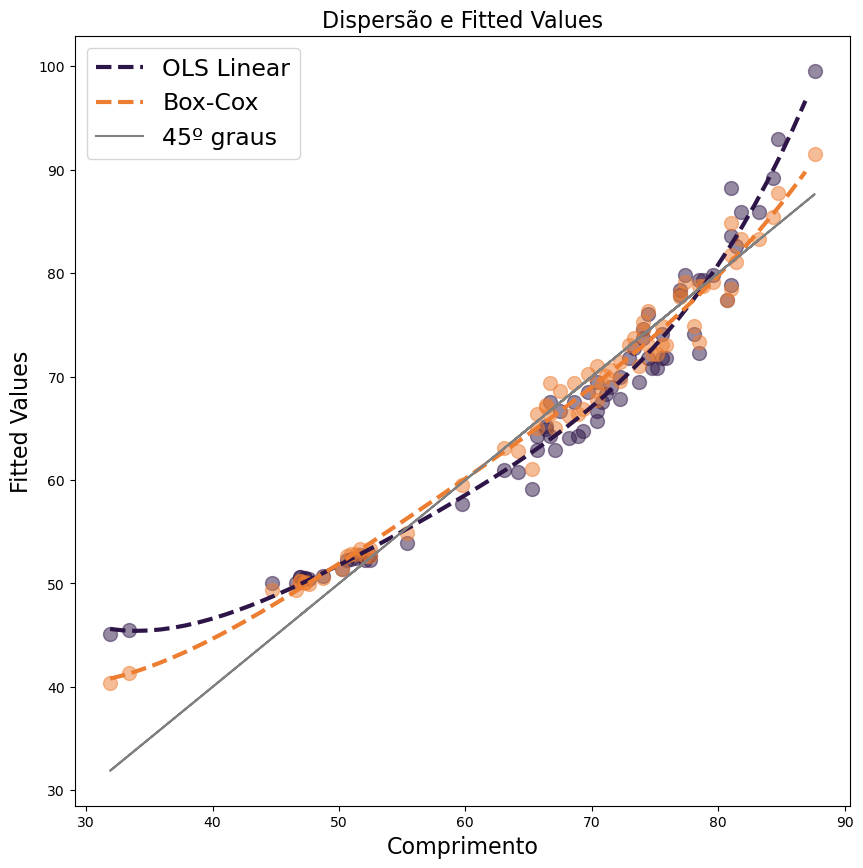

In [26]:
# In[ ]: Ajustes dos modelos
#valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + e

xdata = df_bebes['comprimento']
ydata_linear = df_bebes['yhat_linear']
ydata_bc = df_bebes['yhat_modelo_bc']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_linear, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_bc, alpha=0.5, s=100, color='#ed7d31')
plt.xlabel('Comprimento', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['OLS Linear','Box-Cox','45º graus'], fontsize=17)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()
